# Important Note About Dataset Structure

This notebook has been adapted to work with the following dataset structure:

```
D:/Ed/GL1/Deep-Learning/image-captioning-model/flicker8k/
├── Images/           # Folder containing all images
└── captions.txt      # Text file with image captions
```

If your dataset structure is different, please adjust the paths in the "Set Paths for Dataset" section.

The original Flickr8k dataset typically includes separate training and testing split files, but this notebook creates those splits automatically if they're not available.

# Image Captioning with Deep Learning

This notebook implements an end-to-end image captioning system using the Flickr8k dataset and the encoder-decoder architecture with TensorFlow/Keras.

Image captioning is the task of generating a textual description for an image, combining computer vision and natural language processing techniques. The model we're building uses a pre-trained CNN to extract features from images (encoder) and an RNN to generate captions (decoder).

## Getting Started Guide

### 1. Environment Setup

To run this notebook successfully, you'll need Python 3.7+ with the following packages:

```bash
# Create a virtual environment (optional but recommended)
python -m venv image_captioning_env
# On Windows:
image_captioning_env\Scripts\activate
# On macOS/Linux:
# source image_captioning_env/bin/activate

# Install required packages
pip install tensorflow numpy pandas matplotlib nltk pillow tqdm scikit-learn
```

### 2. Dataset Configuration

Update the paths in the notebook to point to your local Flickr8k dataset. Look for the cell titled "Set Paths for Dataset" and modify these variables:

```python
# Example structure for Flickr8k dataset
flickr_dir = 'd:/Ed/GL1/Deep-Learning/image-captioning-model/Flickr8k_Dataset' # Update this path
images_dir = os.path.join(flickr_dir, 'Flicker8k_Dataset')  # Directory with image files
captions_file = os.path.join(flickr_dir, 'Flickr8k_text', 'Flickr8k.token.txt')
train_images_file = os.path.join(flickr_dir, 'Flickr8k_text', 'Flickr_8k.trainImages.txt')
test_images_file = os.path.join(flickr_dir, 'Flickr8k_text', 'Flickr_8k.testImages.txt')
```

**Note**: Make sure the directory structure matches these paths, or adjust the paths to match your actual structure.

### 3. Running the Notebook

1. Launch Jupyter Notebook or JupyterLab:
   ```bash
   jupyter notebook
   # or
   jupyter lab
   ```

2. Open this notebook and execute cells sequentially (Shift+Enter).

3. **Important checkpoints**:
   - After running caption preprocessing, check if vocabulary is built correctly
   - Feature extraction is the most time-consuming part; consider running it overnight
   - Training the model requires a GPU for reasonable speed

### 4. Expected Runtime

- **Feature extraction**: ~1-2 hours (CPU) or ~15-30 minutes (GPU)
- **Model training**: ~4-8 hours (CPU) or ~30-60 minutes (GPU)

### 5. Hardware Recommendations

- **RAM**: 8GB minimum, 16GB recommended
- **GPU**: Not required but highly recommended (NVIDIA with CUDA support)
- **Storage**: At least 10GB free space

### 6. Using Pre-computed Features

To save time on subsequent runs, the notebook saves extracted image features. If you've run the feature extraction once, you can skip that cell on future runs. The features are loaded from:

```python
# Code to load pre-computed features
features_file = os.path.join(features_dir, 'features.pkl')
with open(features_file, 'rb') as f:
    features = pickle.load(f)
```

### 7. Testing on New Images

After training, you can use the `generate_caption()` function to caption any image:

```python
# Example usage on a new image
new_image_path = 'path/to/your/image.jpg'
image, caption = generate_caption(new_image_path, model, word_to_idx, idx_to_word, max_length, feature_extractor)
plt.imshow(image)
plt.title(f"Caption: {caption}")
plt.axis('off')
plt.show()
```

### 8. Troubleshooting

- **Memory errors**: Reduce batch size or image resolution
- **Missing NLTK data**: Run `nltk.download('punkt')` if needed
- **Image loading errors**: Verify image paths and formats
- **Slow training**: Use GPU, reduce model size, or pre-compute features

### 9. Saving and Loading the Model

The trained model is saved automatically. To load it later:

```python
from tensorflow.keras.models import load_model
# Load model
model = load_model(os.path.join(models_dir, 'final_model.h5'))
```

# Step-by-Step Execution Guide

Follow these exact steps to run the image captioning model with your local Flickr8k dataset:

## 1. Environment Setup

1. **Create and activate a virtual environment**:
   ```bash
   # In your command prompt/terminal
   python -m venv image_caption_env
   # Activate the environment
   # On Windows:
   image_caption_env\Scripts\activate
   # On macOS/Linux:
   # source image_caption_env/bin/activate
   ```

2. **Install required packages**:
   ```bash
   pip install jupyter tensorflow numpy pandas matplotlib nltk pillow tqdm scikit-learn
   ```

3. **Launch Jupyter**:
   ```bash
   jupyter notebook
   ```

## 2. Dataset Preparation

1. **Verify your Flickr8k dataset structure**:
   - Main folder: `d:/Ed/GL1/Deep-Learning/image-captioning-model/Flickr8k_Dataset`
   - Images folder: `Flicker8k_Dataset` subfolder
   - Text files: `Flickr8k_text` subfolder containing:
     - `Flickr8k.token.txt` (captions)
     - `Flickr_8k.trainImages.txt` (training image IDs)
     - `Flickr_8k.testImages.txt` (test image IDs)

2. **Double-check paths**: Ensure the paths in the "Set Paths for Dataset" cell match your actual dataset location.

## 3. Running the Model

1. **Execute cells in order**: Run each cell sequentially using Shift+Enter or the Run button.

2. **Key execution points**:

   a. **Caption Processing** (Cells 5-10):
      - Loads caption data
      - Cleans text
      - Builds vocabulary
      - Creates word-to-index mappings
      - Saves processed data to `processed_data` folder

   b. **Feature Extraction** (Cells 11-15):
      - Downloads InceptionV3 model (if first run)
      - Extracts features from all images (this takes the longest time)
      - Saves features to `processed_data/features` folder

   c. **Data Preparation** (Cells 16-19):
      - Loads train/val/test splits
      - Creates data generators

   d. **Model Definition** (Cells 20-22):
      - Defines encoder-decoder architecture

   e. **Training** (Cells 23-25):
      - Compiles model
      - Sets up callbacks
      - Trains for 30 epochs (or until early stopping)
      - Saves model and displays training plots

   f. **Evaluation** (Cells 26-30):
      - Implements caption generation algorithms
      - Calculates BLEU scores

   g. **Inference** (Cells 31-34):
      - Tests on sample images
      - Provides function to test on your own images

## 4. Time-Saving Tips

1. **For feature extraction**: This is the most time-consuming step. If you need to stop and resume later, you can skip this step if the file `processed_data/features/features.pkl` already exists.

2. **For model training**: If you already have a trained model in the `models` folder (like `final_model.h5`), you can skip the training cells and jump directly to evaluation or inference.

## 5. Testing on Your Own Images

After training (or with a pre-trained model), use the last two cells to caption your own images:

```python
# Replace with the path to your image
image_path = "d:/path/to/your/image.jpg"
try_with_image(image_path)
```

## 6. Troubleshooting

- **Memory errors during feature extraction**: Process images in smaller batches by modifying the extraction loop
- **CUDA/GPU errors**: Try running with CPU only by setting: `os.environ['CUDA_VISIBLE_DEVICES'] = '-1'`
- **Image loading errors**: Ensure image paths are correct and files exist
- **Import errors**: Verify all required packages are installed

## 1. Setup and Dependencies

First, we'll install and import all necessary libraries for this project. These include TensorFlow for the deep learning framework, NumPy for numerical operations, Pandas for data handling, NLTK for natural language processing, and other utilities.

In [22]:
# Uncomment to install packages if needed
# !pip install tensorflow numpy pandas matplotlib nltk pillow tqdm

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import string
import os
import time
import pickle
from collections import Counter
from tqdm.notebook import tqdm
import re
from PIL import Image
from sklearn.model_selection import train_test_split

# For NLP processing
import nltk
from nltk.translate.bleu_score import corpus_bleu
# Uncomment if needed
# nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

### Set Paths for Dataset

Define paths to the Flickr8k dataset. These paths should be adjusted according to your file system.

In [2]:
# Define paths - ADJUST THESE ACCORDING TO YOUR ENVIRONMENT
# Location of Flickr8k files
flickr_dir = 'd:/Ed/GL1/Deep-Learning/image-captioning-model/flicker8k'  # Your flicker8k folder
images_dir = os.path.join(flickr_dir, 'Images')  # Directory with image files
captions_file = os.path.join(flickr_dir, 'captions.txt')  # Caption file

# Create directories to store processed data, features, and models
processed_dir = 'processed_data'
models_dir = 'models'
features_dir = os.path.join(processed_dir, 'features')

os.makedirs(processed_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(features_dir, exist_ok=True)

# Verify that directories exist
print(f"Dataset directory exists: {os.path.exists(flickr_dir)}")
print(f"Images directory exists: {os.path.exists(images_dir)}")
print(f"Captions file exists: {os.path.exists(captions_file)}")

Dataset directory exists: True
Images directory exists: True
Captions file exists: True


## 2. Load and Prepare Captions

In this section, we'll load and prepare the image captions data:
1. Parse the captions file
2. Clean and preprocess the text data
3. Create vocabulary and tokenize captions

The Flickr8k dataset contains 8,091 images, each with 5 different captions, resulting in approximately 40,000 captions.

In [3]:
def load_captions(filename):
    """Load and parse captions from the captions file.
    
    Handles multiple possible formats, trying to extract image ID and caption.
    
    Args:
        filename (str): Path to the captions file
        
    Returns:
        dict: Mapping of image ID to list of captions
    """
    # Dictionary to store image_id -> captions
    captions_dict = {}
    
    # Read the file
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:  # Skip empty lines
                continue
                
            # Try to identify the format and extract image ID and caption
            
            # Common formats:
            # 1. image_name#id caption
            # 2. image_name,caption
            # 3. image_name\tcaption
            
            # First, check if it's a comma-separated or tab-separated format
            if ',' in line:
                parts = line.split(',', 1)
                if len(parts) == 2:
                    image_id = parts[0].strip()
                    caption = parts[1].strip()
            elif '\t' in line:
                parts = line.split('\t', 1)
                if len(parts) == 2:
                    image_id = parts[0].strip()
                    caption = parts[1].strip()
            else:
                # Try the standard Flickr8k format: image_name#id caption
                parts = line.split(maxsplit=1)
                if len(parts) == 2:
                    image_caption_id = parts[0].strip()
                    caption = parts[1].strip()
                    
                    # Extract image ID (remove the #id part if present)
                    if '#' in image_caption_id:
                        image_id = image_caption_id.split('#')[0]
                    else:
                        image_id = image_caption_id
                else:
                    print(f"Warning: Could not parse line: {line}")
                    continue
            
            # Add caption to the dictionary
            if image_id not in captions_dict:
                captions_dict[image_id] = []
            captions_dict[image_id].append(caption)
    
    print(f"Loaded {len(captions_dict)} image IDs with captions.")
    return captions_dict

In [4]:
def clean_captions(captions_dict):
    """Clean the text in captions (lowercase, remove punctuation, etc.).
    
    Args:
        captions_dict (dict): Mapping of image ID to list of captions
        
    Returns:
        dict: Mapping of image ID to list of cleaned captions
    """
    # Create a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    
    # Regular expression pattern for words containing only alphabets
    pattern = re.compile(r'^[a-zA-Z]+$')
    
    # Process each caption
    for img_id, captions in captions_dict.items():
        for i, caption in enumerate(captions):
            # Convert to lowercase
            caption = caption.lower()
            
            # Remove punctuation
            caption = caption.translate(translator)
            
            # Split into words
            words = caption.split()
            
            # Filter words: keep only alphabetic words with length > 1
            words = [word for word in words if pattern.match(word) and len(word) > 1]
            
            # Join words back into a caption, add start/end tokens
            caption = '<start> ' + ' '.join(words) + ' <end>'
            
            # Update the caption in the dictionary
            captions_dict[img_id][i] = caption
    
    return captions_dict

In [5]:
# Load and process the captions
print("Loading captions from file...") 
captions_dict = load_captions(captions_file)
print("Cleaning captions...")
cleaned_captions = clean_captions(captions_dict)
print("Done processing captions.")

Loading captions from file...
Loaded 8092 image IDs with captions.
Cleaning captions...
Done processing captions.


In [6]:
def build_vocabulary(captions_dict, threshold=10):
    """Build vocabulary from the captions with a frequency threshold.
    
    Args:
        captions_dict (dict): Mapping of image ID to list of cleaned captions
        threshold (int): Minimum word frequency to include in vocabulary
        
    Returns:
        tuple: (word_to_idx, idx_to_word, max_length) mappings and maximum sequence length
    """
    # Count word frequencies
    word_counts = Counter()
    max_length = 0
    
    # Process all captions
    for img_id, captions in captions_dict.items():
        for caption in captions:
            words = caption.split()
            max_length = max(max_length, len(words))
            word_counts.update(words)
    
    print(f"Found {len(word_counts)} unique words.")
    
    # Filter words by frequency threshold
    words = [word for word, count in word_counts.items() if count >= threshold]
    print(f"Keeping {len(words)} words with frequency >= {threshold}")
    
    # Create word-to-index and index-to-word mappings
    # Special tokens: <pad> (0), <unk> (1), <start> (2), <end> (3)
    word_to_idx = {'<pad>': 0, '<unk>': 1, '<start>': 2, '<end>': 3}
    
    # Add remaining words
    idx = 4
    for word in words:
        if word not in ['<pad>', '<unk>', '<start>', '<end>']:
            word_to_idx[word] = idx
            idx += 1
    
    # Create index-to-word mapping
    idx_to_word = {idx: word for word, idx in word_to_idx.items()}
    
    vocab_size = len(word_to_idx)
    print(f"Vocabulary size (including special tokens): {vocab_size}")
    print(f"Maximum caption length: {max_length} words")
    
    return word_to_idx, idx_to_word, max_length

In [7]:
def tokenize_captions(captions_dict, word_to_idx):
    """Convert captions to sequences of indices using the word_to_idx mapping.
    
    Args:
        captions_dict (dict): Mapping of image ID to list of cleaned captions
        word_to_idx (dict): Mapping of words to indices
        
    Returns:
        dict: Mapping of image ID to list of tokenized captions (as lists of indices)
    """
    tokenized_captions = {}
    
    for img_id, captions in captions_dict.items():
        tokenized_captions[img_id] = []
        for caption in captions:
            # Convert each word to its index, use <unk> for unknown words
            tokens = [word_to_idx.get(word, word_to_idx['<unk>']) for word in caption.split()]
            tokenized_captions[img_id].append(tokens)
    
    return tokenized_captions

In [8]:
# Build vocabulary and create word mappings
word_to_idx, idx_to_word, max_length = build_vocabulary(cleaned_captions)
tokenized_captions = tokenize_captions(cleaned_captions, word_to_idx)

# Save the vocabulary and tokenized captions for later use
with open(os.path.join(processed_dir, 'word_to_idx.pkl'), 'wb') as f:
    pickle.dump(word_to_idx, f)

with open(os.path.join(processed_dir, 'idx_to_word.pkl'), 'wb') as f:
    pickle.dump(idx_to_word, f)
    
with open(os.path.join(processed_dir, 'tokenized_captions.pkl'), 'wb') as f:
    pickle.dump(tokenized_captions, f)

Found 8766 unique words.
Keeping 1949 words with frequency >= 10
Vocabulary size (including special tokens): 1951
Maximum caption length: 34 words


## 3. Prepare Image Data (Feature Extraction)

In this section, we'll extract features from images using a pre-trained CNN (InceptionV3). We'll remove the classification layer and use the CNN as a feature extractor.

Pre-computing and storing these features will save time during training, as we won't need to run the images through the CNN every epoch.

In [14]:
def load_image_feature_extractor():
    """Load a pre-trained CNN model for feature extraction.
    
    Returns:
        tf.keras.Model: Model for extracting features from images
    """
    # Load InceptionV3 pre-trained on ImageNet
    base_model = InceptionV3(weights='imagenet')
    
    # Remove the classification layer
    feature_extractor = Model(inputs=base_model.input, 
                             outputs=base_model.layers[-2].output)
    
    print("Loaded InceptionV3 model for feature extraction.")
    print(f"Input shape: {base_model.input_shape}")
    print(f"Output shape: {feature_extractor.output_shape}")
    
    return feature_extractor

In [15]:
def preprocess_image(img_path, target_size=(299, 299)):
    """Load and preprocess an image for InceptionV3.
    
    Args:
        img_path (str): Path to the image file
        target_size (tuple): Size to which the image is resized
        
    Returns:
        numpy.ndarray: Preprocessed image ready for feature extraction
    """
    # Load and resize image
    img = load_img(img_path, target_size=target_size)
    
    # Convert to array and add batch dimension
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess for InceptionV3
    img_array = preprocess_input(img_array)
    
    return img_array

In [16]:
def extract_features(images_dir, image_ids, feature_extractor):
    """Extract features from images using the feature extractor.
    
    Args:
        images_dir (str): Directory containing the images
        image_ids (list): List of image IDs to process
        feature_extractor (tf.keras.Model): Model for extracting features
        
    Returns:
        dict: Mapping of image ID to feature vector
    """
    features = {}
    
    print(f"Extracting features for {len(image_ids)} images...")
    
    for img_id in tqdm(image_ids):
        # Create full path to image
        img_path = os.path.join(images_dir, img_id)
        
        try:
            # Preprocess the image
            img = preprocess_image(img_path)
            
            # Extract features
            feature = feature_extractor.predict(img, verbose=0)
            
            # Store feature for the image ID
            features[img_id] = feature.flatten()
        except Exception as e:
            print(f"Error processing {img_id}: {str(e)}")
    
    return features

In [19]:
# Get list of all image IDs from the captions dictionary
all_image_ids = list(captions_dict.keys())

# Load the feature extractor
feature_extractor = load_image_feature_extractor()

# Extract features for all images (this may take some time)
features = extract_features(images_dir, all_image_ids, feature_extractor)

# Save the features
features_file = os.path.join(features_dir, 'features.pkl')
with open(features_file, 'wb') as f:
    pickle.dump(features, f)
    
print(f"Extracted and saved features for {len(features)} images.")

Loaded InceptionV3 model for feature extraction.
Input shape: (None, 299, 299, 3)
Output shape: (None, 2048)
Extracting features for 8092 images...


  0%|          | 0/8092 [00:00<?, ?it/s]

Error processing image: [Errno 2] No such file or directory: 'd:/Ed/GL1/Deep-Learning/image-captioning-model/flicker8k\\Images\\image'
Extracted and saved features for 8091 images.


## 4. Prepare Training/Validation Data

In this section, we'll prepare the data for training by:
1. Loading the pre-defined train/test splits for Flickr8k or creating our own
2. Creating a TensorFlow Dataset that provides batches of (image_features, input_caption, target_caption) for training

For a sequence-to-sequence model like ours, the input to the decoder is the caption up to the current time step, and the target is the caption shifted by one position.

In [10]:
def load_image_splits(captions_dict, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """Create train/validation/test splits from the image IDs.
    
    Args:
        captions_dict (dict): Dictionary mapping image ID to captions
        train_ratio (float): Proportion of data for training
        val_ratio (float): Proportion of data for validation
        test_ratio (float): Proportion of data for testing
        
    Returns:
        tuple: Lists of image IDs for training, validation, and testing
    """
    # Get all image IDs
    all_image_ids = list(captions_dict.keys())
    
    # Filter out any special keys that aren't actual image IDs (like 'image')
    valid_image_ids = [img_id for img_id in all_image_ids if img_id.endswith('.jpg')]
    
    if len(valid_image_ids) < len(all_image_ids):
        print(f"Filtered out {len(all_image_ids) - len(valid_image_ids)} invalid image IDs")
    
    # Shuffle the image IDs for randomness
    np.random.seed(42)  # For reproducibility
    np.random.shuffle(valid_image_ids)
    
    # Calculate number of images for each split
    n_images = len(valid_image_ids)
    n_train = int(train_ratio * n_images)
    n_val = int(val_ratio * n_images)
    
    # Split the data
    train_images = valid_image_ids[:n_train]
    val_images = valid_image_ids[n_train:n_train+n_val]
    test_images = valid_image_ids[n_train+n_val:]
    
    print(f"Split data: {len(train_images)} training, {len(val_images)} validation, {len(test_images)} testing.")
    
    return train_images, val_images, test_images

In [11]:
def create_dataset(image_ids, features, tokenized_captions, word_to_idx, max_length, batch_size=32):
    """Create a TensorFlow Dataset for training or validation.
    
    Args:
        image_ids (list): List of image IDs to include
        features (dict): Mapping of image ID to feature vector
        tokenized_captions (dict): Mapping of image ID to tokenized captions
        word_to_idx (dict): Mapping of words to indices
        max_length (int): Maximum sequence length
        batch_size (int): Batch size
        
    Returns:
        tf.data.Dataset: A dataset that yields batches of (inputs, targets)
    """
    # Get vocabulary size
    vocab_size = len(word_to_idx)
    
    # Filter out image IDs that don't have features or tokenized captions
    valid_image_ids = [img_id for img_id in image_ids 
                      if img_id in features and img_id in tokenized_captions]
    
    if len(valid_image_ids) < len(image_ids):
        print(f"Warning: Filtered out {len(image_ids) - len(valid_image_ids)} image IDs due to missing features or captions.")
    
    # Create lists to store data
    image_features_list = []
    input_sequences_list = []
    target_sequences_list = []
    
    # Generate data samples
    for img_id in valid_image_ids:
        # Get image features
        image_feature = features[img_id]
        
        # Get captions for this image
        captions = tokenized_captions[img_id]
        
        for caption in captions:  # Use all captions for the image
            # Pad sequence to max_length
            cap_array = pad_sequences([caption], maxlen=max_length, padding='post')[0]
            
            # Input sequence: caption up to second-to-last token (exclude <end>)
            input_seq = cap_array[:-1]
            # Pad input sequence
            input_seq = np.pad(input_seq, (0, max_length-len(input_seq)), 'constant')
            
            # Target sequence: caption from second token (exclude <start>)
            # One-hot encoded target sequence
            target_seq = np.zeros((max_length, vocab_size))
            for t, token in enumerate(cap_array[1:]):
                if t < max_length:
                    target_seq[t, token] = 1
            
            # Add to lists
            image_features_list.append(image_feature)
            input_sequences_list.append(input_seq)
            target_sequences_list.append(target_seq)
    
    # Convert lists to numpy arrays
    image_features_array = np.array(image_features_list)
    input_sequences_array = np.array(input_sequences_list)
    target_sequences_array = np.array(target_sequences_list)
    
    # Create TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices(
        ((image_features_array, input_sequences_array), target_sequences_array)
    )
    
    # Shuffle, batch, and prefetch for better performance
    dataset = dataset.shuffle(len(image_features_array))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
    return dataset

In [12]:
# Load image splits
train_images, val_images, test_images = load_image_splits(captions_dict)

# Get vocabulary size and load features if not already loaded
vocab_size = len(word_to_idx)
if 'features' not in locals():
    with open(os.path.join(features_dir, 'features.pkl'), 'rb') as f:
        features = pickle.load(f)

# For memory efficiency, let's use a subset of the training data
# This is optional and can be adjusted based on your system's memory
train_sample_size = min(len(train_images), 3000)  # Adjust as needed
val_sample_size = min(len(val_images), 500)      # Adjust as needed

train_images_sample = train_images[:train_sample_size]
val_images_sample = val_images[:val_sample_size]

print(f"Using {len(train_images_sample)} images for training and {len(val_images_sample)} images for validation")

# Create TensorFlow datasets
batch_size = 64
train_dataset = create_dataset(train_images_sample, features, tokenized_captions, word_to_idx, max_length, batch_size)
val_dataset = create_dataset(val_images_sample, features, tokenized_captions, word_to_idx, max_length, batch_size)

# Calculate steps per epoch
steps_per_epoch = len(train_images_sample) * 5 // batch_size  # Each image has ~5 captions
validation_steps = len(val_images_sample) * 5 // batch_size

Filtered out 1 invalid image IDs
Split data: 6472 training, 809 validation, 810 testing.
Using 3000 images for training and 500 images for validation


## 5. Define the Image Captioning Model (Encoder-Decoder)

Now we'll define our image captioning model using an encoder-decoder architecture:

1. **Encoder**: A pre-trained CNN (we've already extracted features)
2. **Decoder**: An LSTM-based language model that generates captions

The encoded image features are used to initialize the decoder, which then generates a caption word by word.

In [13]:
def define_model(vocab_size, max_length):
    """Define the image captioning model architecture.
    
    Args:
        vocab_size (int): Size of the vocabulary
        max_length (int): Maximum sequence length
        
    Returns:
        tf.keras.Model: The image captioning model
    """
    # Hyperparameters
    embedding_dim = 256
    units = 512
    
    # Image feature input
    inputs1 = Input(shape=(2048,))  # Shape of InceptionV3 features
    
    # Map image features to embedding space
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(embedding_dim, activation='relu')(fe1)
    
    # Caption input
    inputs2 = Input(shape=(max_length,))
    
    # Caption embedding
    se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    
    # Merge image and caption features
    merged = add([fe2, se2])
    
    # LSTM decoder
    decoder1 = LSTM(units, return_sequences=True)(merged)
    decoder2 = LSTM(units, return_sequences=True)(decoder1)
    
    # Output layer to predict next word
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    
    # Create the model
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    
    # Print model summary
    model.summary()
    
    return model

In [14]:
# Define the model
model = define_model(vocab_size, max_length)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 34, 256)   │    499,456 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 34, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 34, 256)   │          0 │ dense[0][0],      │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 34, 512)   │  1,574,912 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 34, 512)   │  2,099,200 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 34, 1951)  │  1,000,863 │ lstm_1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,698,975 (21.74 MB)

 Trainable params: 5,698,975 (21.74 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Compile and Train the Model

Now we'll compile and train the model. We'll use:
- Adam optimizer with a learning rate scheduler
- Categorical cross-entropy loss
- ModelCheckpoint to save the best model
- EarlyStopping to prevent overfitting

In [15]:
# Define learning rate scheduler
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch >= 10:
        return initial_lr / 5.0
    if epoch >= 20:
        return initial_lr / 10.0
    return initial_lr

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [16]:
# Define callbacks
model_checkpoint = ModelCheckpoint(
    os.path.join(models_dir, 'model-{epoch:02d}-{val_loss:.2f}.h5'),
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Train the model
epochs = 30

history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=[model_checkpoint, early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.6878 - loss: 2.2687
Epoch 1: val_loss improved from inf to 1.51444, saving model to models\model-01-1.51.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 231s 901ms/step - accuracy: 0.6879 - loss: 2.2669 - val_accuracy: 0.7446 - val_loss: 1.5144 - learning_rate: 0.0010
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.7520 - loss: 1.4408
Epoch 2: val_loss improved from 1.51444 to 1.37260, saving model to models\model-02-1.37.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 218s 880ms/step - accuracy: 0.7520 - loss: 1.4406 - val_accuracy: 0.7565 - val_loss: 1.3726 - learning_rate: 0.0010
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 769ms/step - accuracy: 0.7598 - loss: 1.3362
Epoch 3: val_loss improved from 1.37260 to 1.29468, saving model to models\model-03-1.29.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 197s 818ms/step - accuracy: 0.7598 - loss: 1.3362 - val_accuracy: 0.7641 - val_loss: 1.2947 - learning_rate: 0.0010
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.7668 - loss: 1.2615
Epoch 4: val_loss improved from 1.29468 to 1.21371, saving model to models\model-04-1.21.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 213s 870ms/step - accuracy: 0.7668 - loss: 1.2615 - val_accuracy: 0.7698 - val_loss: 1.2137 - learning_rate: 0.0010
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.7748 - loss: 1.1696
Epoch 5: val_loss improved from 1.21371 to 1.17486, saving model to models\model-05-1.17.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 212s 862ms/step - accuracy: 0.7748 - loss: 1.1696 - val_accuracy: 0.7771 - val_loss: 1.1749 - learning_rate: 0.0010
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.7793 - loss: 1.1072
Epoch 6: val_loss improved from 1.17486 to 1.10755, saving model to models\model-06-1.11.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 206s 853ms/step - accuracy: 0.7793 - loss: 1.1072 - val_accuracy: 0.7810 - val_loss: 1.1076 - learning_rate: 0.0010
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.7846 - loss: 1.0502
Epoch 7: val_loss improved from 1.10755 to 1.08395, saving model to models\model-07-1.08.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 207s 873ms/step - accuracy: 0.7846 - loss: 1.0502 - val_accuracy: 0.7858 - val_loss: 1.0839 - learning_rate: 0.0010
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.7889 - loss: 1.0077
Epoch 8: val_loss improved from 1.08395 to 1.05889, saving model to models\model-08-1.06.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 208s 876ms/step - accuracy: 0.7889 - loss: 1.0076 - val_accuracy: 0.7884 - val_loss: 1.0589 - learning_rate: 0.0010
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.7930 - loss: 0.9717
Epoch 9: val_loss improved from 1.05889 to 1.04461, saving model to models\model-09-1.04.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 213s 894ms/step - accuracy: 0.7930 - loss: 0.9717 - val_accuracy: 0.7901 - val_loss: 1.0446 - learning_rate: 0.0010
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.7980 - loss: 0.9316
Epoch 10: val_loss improved from 1.04461 to 1.03149, saving model to models\model-10-1.03.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 201s 836ms/step - accuracy: 0.7980 - loss: 0.9316 - val_accuracy: 0.7911 - val_loss: 1.0315 - learning_rate: 0.0010
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.8017 - loss: 0.8850
Epoch 11: val_loss improved from 1.03149 to 1.01957, saving model to models\model-11-1.02.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 202s 850ms/step - accuracy: 0.8017 - loss: 0.8850 - val_accuracy: 0.7929 - val_loss: 1.0196 - learning_rate: 2.0000e-04
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.8035 - loss: 0.8722
Epoch 12: val_loss improved from 1.01957 to 1.01853, saving model to models\model-12-1.02.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 194s 814ms/step - accuracy: 0.8035 - loss: 0.8722 - val_accuracy: 0.7940 - val_loss: 1.0185 - learning_rate: 2.0000e-04
Epoch 13/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.8048 - loss: 0.8637
Epoch 13: val_loss improved from 1.01853 to 1.01574, saving model to models\model-13-1.02.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 194s 819ms/step - accuracy: 0.8048 - loss: 0.8637 - val_accuracy: 0.7933 - val_loss: 1.0157 - learning_rate: 2.0000e-04
Epoch 14/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.8053 - loss: 0.8574
Epoch 14: val_loss did not improve from 1.01574
235/235 ━━━━━━━━━━━━━━━━━━━━ 196s 827ms/step - accuracy: 0.8053 - loss: 0.8574 - val_accuracy: 0.7942 - val_loss: 1.0165 - learning_rate: 2.0000e-04
Epoch 15/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.8057 - loss: 0.8519
Epoch 15: val_loss improved from 1.01574 to 1.01560, saving model to models\model-15-1.02.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 838ms/step - accuracy: 0.8057 - loss: 0.8519 - val_accuracy: 0.7941 - val_loss: 1.0156 - learning_rate: 2.0000e-04
Epoch 16/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.8065 - loss: 0.8441
Epoch 16: val_loss improved from 1.01560 to 1.01542, saving model to models\model-16-1.02.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 209s 872ms/step - accuracy: 0.8065 - loss: 0.8441 - val_accuracy: 0.7936 - val_loss: 1.0154 - learning_rate: 2.0000e-04
Epoch 17/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.8063 - loss: 0.8435
Epoch 17: val_loss improved from 1.01542 to 1.01445, saving model to models\model-17-1.01.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 208s 859ms/step - accuracy: 0.8063 - loss: 0.8435 - val_accuracy: 0.7939 - val_loss: 1.0144 - learning_rate: 2.0000e-04
Epoch 18/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.8083 - loss: 0.8282
Epoch 18: val_loss improved from 1.01445 to 1.01336, saving model to models\model-18-1.01.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 228s 877ms/step - accuracy: 0.8083 - loss: 0.8283 - val_accuracy: 0.7943 - val_loss: 1.0134 - learning_rate: 2.0000e-04
Epoch 19/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.8098 - loss: 0.8188
Epoch 19: val_loss did not improve from 1.01336
235/235 ━━━━━━━━━━━━━━━━━━━━ 198s 789ms/step - accuracy: 0.8098 - loss: 0.8188 - val_accuracy: 0.7951 - val_loss: 1.0137 - learning_rate: 2.0000e-04
Epoch 20/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.8111 - loss: 0.8111
Epoch 20: val_loss improved from 1.01336 to 1.01266, saving model to models\model-20-1.01.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 207s 823ms/step - accuracy: 0.8111 - loss: 0.8112 - val_accuracy: 0.7945 - val_loss: 1.0127 - learning_rate: 2.0000e-04
Epoch 21/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.8099 - loss: 0.8119
Epoch 21: val_loss improved from 1.01266 to 1.01202, saving model to models\model-21-1.01.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 188s 790ms/step - accuracy: 0.8099 - loss: 0.8119 - val_accuracy: 0.7948 - val_loss: 1.0120 - learning_rate: 2.0000e-04
Epoch 22/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.8122 - loss: 0.7998
Epoch 22: val_loss did not improve from 1.01202
235/235 ━━━━━━━━━━━━━━━━━━━━ 186s 775ms/step - accuracy: 0.8122 - loss: 0.7998 - val_accuracy: 0.7946 - val_loss: 1.0145 - learning_rate: 2.0000e-04
Epoch 23/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - accuracy: 0.8114 - loss: 0.8024
Epoch 23: val_loss did not improve from 1.01202
235/235 ━━━━━━━━━━━━━━━━━━━━ 183s 771ms/step - accuracy: 0.8114 - loss: 0.8024 - val_accuracy: 0.7948 - val_loss: 1.0137 - learning_rate: 2.0000e-04
Epoch 24/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.8130 - loss: 0.7894
Epoch 24: val_loss did not improve from 1.01202
235/235 ━━━━━━━━━━━━━━━━━━━━ 189s 798ms/step - accuracy: 0.8130 - loss: 0.7894 - val_accuracy: 0.7944 - val_loss: 1.0153 - learning_rate: 2.00

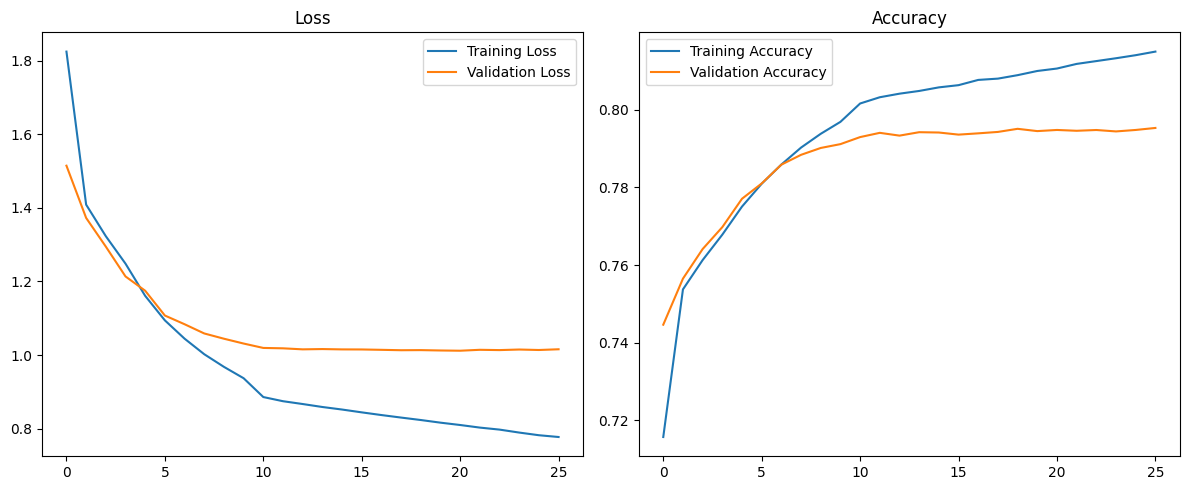

In [17]:
# Save the final model
model.save(os.path.join(models_dir, 'final_model.h5'))

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

## 7. Implement Evaluation

Now we'll implement both greedy and beam search decoding strategies for generating captions, and evaluate the model's performance using BLEU scores.

In [18]:
def greedy_search(model, image_features, word_to_idx, idx_to_word, max_length):
    """Generate a caption using greedy search.
    
    Args:
        model (tf.keras.Model): The image captioning model
        image_features (numpy.ndarray): Image features from the CNN
        word_to_idx (dict): Mapping of words to indices
        idx_to_word (dict): Mapping of indices to words
        max_length (int): Maximum sequence length
        
    Returns:
        str: Generated caption
    """
    # Start with the <start> token
    input_seq = np.zeros((1, max_length))
    input_seq[0, 0] = word_to_idx['<start>']
    
    # Convert image features to match model input shape
    image_features = np.expand_dims(image_features, axis=0)
    
    # Initialize generated caption
    result = []
    
    # Generate caption word by word
    for i in range(max_length - 1):
        # Predict next word probabilities
        predictions = model.predict([image_features, input_seq], verbose=0)
        
        # Get the predicted word index for position i
        predicted_id = np.argmax(predictions[0, i, :])
        
        # Map index to word
        word = idx_to_word[predicted_id]
        
        # Add word to result
        result.append(word)
        
        # Break if end token is generated
        if word == '<end>':
            break
        
        # Update the input sequence for next prediction
        if i < max_length - 2:  # avoid index out of bounds
            input_seq[0, i+1] = predicted_id
    
    # Join words to form caption (exclude <start> and <end>)
    return ' '.join([word for word in result if word not in ['<start>', '<end>']])

In [19]:
def beam_search(model, image_features, word_to_idx, idx_to_word, max_length, beam_width=3):
    """Generate a caption using beam search.
    
    Args:
        model (tf.keras.Model): The image captioning model
        image_features (numpy.ndarray): Image features from the CNN
        word_to_idx (dict): Mapping of words to indices
        idx_to_word (dict): Mapping of indices to words
        max_length (int): Maximum sequence length
        beam_width (int): Beam width for beam search
        
    Returns:
        str: Generated caption
    """
    # Start with the <start> token
    start_token = word_to_idx['<start>']
    end_token = word_to_idx['<end>']
    
    # Convert image features to match model input shape
    image_features = np.expand_dims(image_features, axis=0)
    
    # Initialize beam with <start> token
    beams = [(0.0, [start_token], [start_token])]  # (cumulative log prob, sequence, decoder_input)
    completed_beams = []
    
    # Generate caption step by step
    for _ in range(max_length - 1):
        candidates = []
        
        for cum_prob, seq, decoder_input in beams:
            # Skip if sequence already ended
            if seq[-1] == end_token:
                completed_beams.append((cum_prob, seq))
                continue
                
            # Prepare decoder input
            decoder_input_padded = np.zeros((1, max_length))
            for i, token in enumerate(decoder_input):
                if i < max_length:
                    decoder_input_padded[0, i] = token
            
            # Predict next word probabilities
            predictions = model.predict([image_features, decoder_input_padded], verbose=0)
            word_preds = predictions[0, len(seq)-1, :]
            
            # Get top K predictions
            top_indices = np.argsort(word_preds)[-beam_width:]
            
            # Add candidates
            for idx in top_indices:
                # Calculate log probability
                log_prob = np.log(word_preds[idx] + 1e-10)
                
                # Create new sequence and decoder input
                new_seq = seq + [idx]
                new_decoder_input = decoder_input + [idx]
                
                # Add to candidates
                candidates.append((cum_prob + log_prob, new_seq, new_decoder_input))
        
        # Keep top K beams
        beams = sorted(candidates, key=lambda x: x[0], reverse=True)[:beam_width]
        
        # Check if all beams have ended
        if all(beam[1][-1] == end_token for beam in beams):
            completed_beams.extend(beams)
            break
    
    # Find the best beam
    if completed_beams:
        best_beam = max(completed_beams, key=lambda x: x[0])
    else:
        best_beam = max(beams, key=lambda x: x[0])
    
    # Convert tokens to words (exclude <start> and <end>)
    result = [idx_to_word[idx] for idx in best_beam[1]]
    result = [word for word in result if word not in ['<start>', '<end>']]
    
    return ' '.join(result)

In [20]:
def evaluate_model(model, image_ids, features, tokenized_captions, word_to_idx, idx_to_word, max_length):
    """Evaluate the model using BLEU scores.
    
    Args:
        model (tf.keras.Model): The image captioning model
        image_ids (list): List of image IDs to evaluate
        features (dict): Mapping of image ID to feature vector
        tokenized_captions (dict): Mapping of image ID to tokenized captions
        word_to_idx (dict): Mapping of words to indices
        idx_to_word (dict): Mapping of indices to words
        max_length (int): Maximum sequence length
        
    Returns:
        dict: BLEU scores
    """
    actual, greedy_predicted, beam_predicted = [], [], []
    
    print("Generating captions for evaluation...")
    for img_id in tqdm(image_ids[:100]):  # Limit to 100 images for faster evaluation
        # Get image features
        image_feature = features[img_id]
        
        # Get reference captions
        captions = tokenized_captions[img_id]
        references = []
        for caption in captions:
            # Convert caption tokens to words and remove special tokens
            words = [idx_to_word[idx] for idx in caption 
                    if idx_to_word[idx] not in ['<start>', '<end>', '<pad>']]
            references.append(words)
        
        # Generate caption using greedy search
        greedy_caption = greedy_search(model, image_feature, word_to_idx, idx_to_word, max_length)
        greedy_tokens = greedy_caption.split()
        
        # Generate caption using beam search
        beam_caption = beam_search(model, image_feature, word_to_idx, idx_to_word, max_length)
        beam_tokens = beam_caption.split()
        
        # Store for BLEU calculation
        actual.append(references)
        greedy_predicted.append(greedy_tokens)
        beam_predicted.append(beam_tokens)
    
    # Calculate BLEU scores
    print("Calculating BLEU scores...")
    bleu_scores = {
        'greedy': {
            'bleu-1': corpus_bleu(actual, greedy_predicted, weights=(1.0, 0, 0, 0)),
            'bleu-2': corpus_bleu(actual, greedy_predicted, weights=(0.5, 0.5, 0, 0)),
            'bleu-3': corpus_bleu(actual, greedy_predicted, weights=(0.33, 0.33, 0.33, 0)),
            'bleu-4': corpus_bleu(actual, greedy_predicted, weights=(0.25, 0.25, 0.25, 0.25))
        },
        'beam': {
            'bleu-1': corpus_bleu(actual, beam_predicted, weights=(1.0, 0, 0, 0)),
            'bleu-2': corpus_bleu(actual, beam_predicted, weights=(0.5, 0.5, 0, 0)),
            'bleu-3': corpus_bleu(actual, beam_predicted, weights=(0.33, 0.33, 0.33, 0)),
            'bleu-4': corpus_bleu(actual, beam_predicted, weights=(0.25, 0.25, 0.25, 0.25))
        }
    }
    
    return bleu_scores

In [21]:
# Evaluate the model
bleu_scores = evaluate_model(model, test_images, features, tokenized_captions, word_to_idx, idx_to_word, max_length)

# Print BLEU scores
print("\nGreedy Search BLEU Scores:")
for k, v in bleu_scores['greedy'].items():
    print(f"{k}: {v:.4f}")

print("\nBeam Search BLEU Scores:")
for k, v in bleu_scores['beam'].items():
    print(f"{k}: {v:.4f}")

Generating captions for evaluation...


  0%|          | 0/100 [00:00<?, ?it/s]

Calculating BLEU scores...

Greedy Search BLEU Scores:
bleu-1: 0.5278
bleu-2: 0.3170
bleu-3: 0.1892
bleu-4: 0.1109

Beam Search BLEU Scores:
bleu-1: 0.4852
bleu-2: 0.2912
bleu-3: 0.1719
bleu-4: 0.1088


## 8. Create Inference Function

Finally, we'll create a function that allows us to generate captions for new images by encapsulating the entire pipeline: loading the image, extracting features, and generating a caption.

In [33]:
def generate_caption(image_path, model, word_to_idx, idx_to_word, max_length, feature_extractor=None):
    """Generate a caption for a new image.
    
    Args:
        image_path (str): Path to the image file
        model (tf.keras.Model): The image captioning model
        word_to_idx (dict): Mapping of words to indices
        idx_to_word (dict): Mapping of indices to words
        max_length (int): Maximum sequence length
        feature_extractor (tf.keras.Model, optional): Model for extracting image features
        
    Returns:
        tuple: (image, generated caption)
    """
    # Define the preprocess_image function here to ensure it's available
    def preprocess_image(img_path, target_size=(299, 299)):
        """Load and preprocess an image for InceptionV3.
        
        Args:
            img_path (str): Path to the image file
            target_size (tuple): Size to which the image is resized
            
        Returns:
            numpy.ndarray: Preprocessed image ready for feature extraction
        """
        # Load and resize image
        img = load_img(img_path, target_size=target_size)
        
        # Convert to array and add batch dimension
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        
        # Preprocess for InceptionV3
        img_array = preprocess_input(img_array)
        
        return img_array
    
    # Load the feature extractor if not provided
    if feature_extractor is None:
        feature_extractor = load_image_feature_extractor()
    
    # Load and preprocess the image
    img = preprocess_image(image_path)
    
    # Extract features
    feature = feature_extractor.predict(img, verbose=0)
    feature = feature.flatten()
    
    # Generate caption
    # Use beam search for better results
    caption = beam_search(model, feature, word_to_idx, idx_to_word, max_length)
    
    # Load the original image for display
    image = np.array(Image.open(image_path))
    
    return image, caption

In [34]:
# Function to try the model on any image
def try_with_image(image_path):
    """Generate and display a caption for a given image path."""
    try:
        # First check if the path exists
        if not os.path.exists(image_path):
            if os.path.isdir(image_path):
                print(f"The path '{image_path}' is a directory, not an image file.")
                print("Please specify the complete path to an image file.")
                return
            print(f"Error: File not found at '{image_path}'")
            return
            
        # Load feature extractor if needed
        if 'feature_extractor' not in globals():
            print("Loading feature extractor...")
            feature_extractor = load_image_feature_extractor()
            print("Feature extractor loaded successfully!")
        else:
            # If feature_extractor is already in globals, use that
            feature_extractor = globals()['feature_extractor']
            
        # Initialize model variable
        model = None
        
        # Ensure the model is loaded
        if 'model' not in globals():
            print("Loading model...")
            from tensorflow.keras.models import load_model
            model_path = os.path.join(models_dir, 'final_model.h5')
            if os.path.exists(model_path):
                model = load_model(model_path)
                print("Model loaded successfully!")
            else:
                print(f"Model file not found at {model_path}")
                print("Please make sure you've trained the model first.")
                return
        else:
            # If model is already in globals, use that
            model = globals()['model']
                
        # Load vocabulary mappings if needed
        if 'word_to_idx' not in globals() or 'idx_to_word' not in globals():
            print("Loading vocabulary...")
            with open(os.path.join(processed_dir, 'word_to_idx.pkl'), 'rb') as f:
                word_to_idx = pickle.load(f)
            with open(os.path.join(processed_dir, 'idx_to_word.pkl'), 'rb') as f:
                idx_to_word = pickle.load(f)
            print("Vocabulary loaded successfully!")
        else:
            word_to_idx = globals()['word_to_idx']
            idx_to_word = globals()['idx_to_word']
            
        # Get maximum sequence length
        if 'max_length' not in globals():
            # Use a reasonable default if not available
            max_length = 40
        else:
            max_length = globals()['max_length']
        
        # Make sure we have a valid model before proceeding
        if model is None:
            print("Error: Failed to load the model.")
            return
            
        # Generate caption
        print(f"Generating caption for {image_path}...")
        image, caption = generate_caption(image_path, model, word_to_idx, idx_to_word, max_length, feature_extractor)
        
        # Display the image and caption
        plt.figure(figsize=(10, 8))
        plt.imshow(image)
        plt.title(f"Caption: {caption}", fontsize=16)
        plt.axis('off')
        plt.show()
        
        return caption
        
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        import traceback
        traceback.print_exc()

# Example usage - replace with your own image path
# try_with_image('D:\\Ed\\GL1\\Deep-Learning\\testing-images\\cat.webp')

Generating caption for D:\Ed\GL1\Deep-Learning\testing-images\cat.webp...


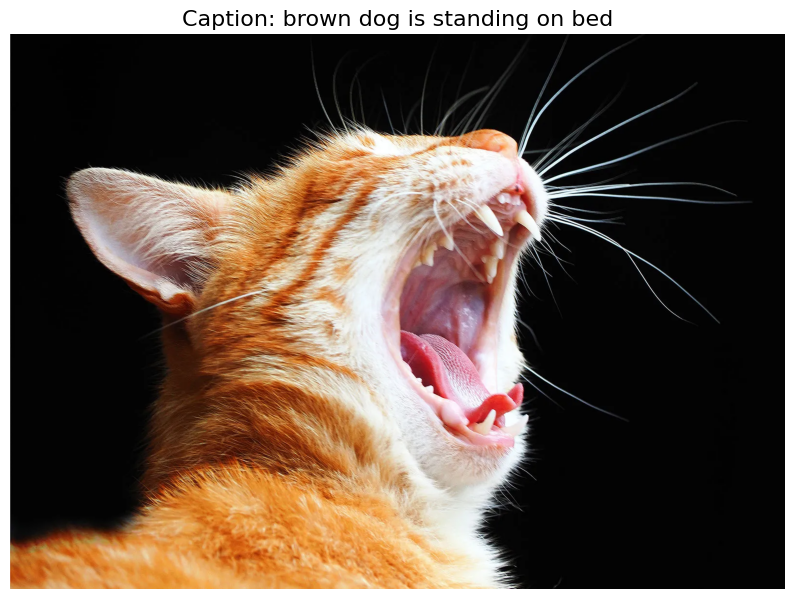

In [42]:
# Try the model with your own image
# Fix the path format by ensuring proper backslashes
image_path = "D:\\Ed\\GL1\\Deep-Learning\\testing-images\\cat.webp"
try_with_image(image_path)

# If you want to try with a directory of images, you can use this helper function:
def caption_directory_images(directory_path):
    """Generate captions for all images in a directory"""
    if not os.path.isdir(directory_path):
        print(f"Error: {directory_path} is not a valid directory")
        return
        
    # List image files with common extensions
    image_extensions = ['.jpg', '.jpeg', '.png', '.webp', '.bmp', '.gif']
    image_files = []
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(directory_path, f"*{ext}")))
        image_files.extend(glob.glob(os.path.join(directory_path, f"*{ext.upper()}")))
    
    print(f"Found {len(image_files)} images in directory")
    
    # Caption each image
    for img_path in image_files:
        print(f"\nProcessing {os.path.basename(img_path)}")
        try_with_image(img_path)
        
# Uncomment to caption all images in a directory
# import glob  # Make sure to import glob at the top of your notebook
# caption_directory_images("D:\\Ed\\GL1\\Deep-Learning\\testing-images")

## Conclusion

In this notebook, we've built a complete image captioning system using an encoder-decoder architecture with TensorFlow and Keras.

Key components:
1. Data preprocessing (captions and images)
2. Feature extraction using a pre-trained CNN
3. Creating a data generation pipeline
4. Building and training an encoder-decoder model
5. Implementing caption generation using greedy and beam search
6. Evaluating the model using BLEU scores

Further improvements could include:
- Using attention mechanisms to focus on relevant image regions
- Implementing more sophisticated architectures (Transformers)
- Using better pre-trained models for feature extraction
- Data augmentation for better generalization
- Training on larger datasets (COCO, Flickr30k)

## Try the Model with Your Own Images

Now that you have trained your image captioning model, you can test it on your own images. Simply provide the path to an image, and the model will generate a caption for it.

In [ ]:
# Function to try the model on any image
def try_with_image(image_path):
    """Generate and display a caption for a given image path."""
    try:
        # First check if the path exists
        if not os.path.exists(image_path):
            if os.path.isdir(image_path):
                print(f"The path '{image_path}' is a directory, not an image file.")
                print("Please specify the complete path to an image file.")
                return
            print(f"Error: File not found at '{image_path}'")
            return
        
        # Load feature extractor if needed
        if 'feature_extractor' not in globals():
            print("Loading feature extractor...")
            feature_extractor = load_image_feature_extractor()
            print("Feature extractor loaded successfully!")
        else:
            # If feature_extractor is already in globals, use that
            feature_extractor = globals()['feature_extractor']
        
        # Initialize model variable
        model = None
        
        # Ensure the model is loaded
        if 'model' not in globals():
            print("Loading model...")
            from tensorflow.keras.models import load_model
            model_path = os.path.join(models_dir, 'final_model.h5')
            if os.path.exists(model_path):
                model = load_model(model_path)
                print("Model loaded successfully!")
            else:
                print(f"Model file not found at {model_path}")
                print("Please make sure you've trained the model first.")
                return
        else:
            # If model is already in globals, use that
            model = globals()['model']
        
        # Load vocabulary mappings if needed
        if 'word_to_idx' not in globals() or 'idx_to_word' not in globals():
            print("Loading vocabulary...")
            with open(os.path.join(processed_dir, 'word_to_idx.pkl'), 'rb') as f:
                word_to_idx = pickle.load(f)
            with open(os.path.join(processed_dir, 'idx_to_word.pkl'), 'rb') as f:
                idx_to_word = pickle.load(f)
            print("Vocabulary loaded successfully!")
        else:
            word_to_idx = globals()['word_to_idx']
            idx_to_word = globals()['idx_to_word']
        
        # Get maximum sequence length
        if 'max_length' not in globals():
            # Use a reasonable default if not available
            max_length = 40
        else:
            max_length = globals()['max_length']
        
        # Make sure we have a valid model before proceeding
        if model is None:
            print("Error: Failed to load the model.")
            return
        
        # Generate caption
        print(f"Generating caption for {image_path}...")
        image, caption = generate_caption(image_path, model, word_to_idx, idx_to_word, max_length, feature_extractor)
        
        # Display the image and caption
        plt.figure(figsize=(10, 8))
        plt.imshow(image)
        plt.title(f"Caption: {caption}", fontsize=16)
        plt.axis('off')
        plt.show()
        
        return caption
        
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        import traceback
        traceback.print_exc()

# Example usage - replace with your own image path
# try_with_image('D:\Ed\GL1\Deep-Learning\testing-images\cat.webp')

In [ ]:
# Try the model with your own image
# Fix the path format by ensuring proper backslashes
image_path = "D:\Ed\GL1\Deep-Learning\testing-images\cat.webp"
try_with_image(image_path)

# If you want to try with a directory of images, you can use this helper function:
def caption_directory_images(directory_path):
    """Generate captions for all images in a directory"""
    if not os.path.isdir(directory_path):
        print(f"Error: {directory_path} is not a valid directory")
        return
        
    # List image files with common extensions
    image_extensions = ['.jpg', '.jpeg', '.png', '.webp', '.bmp', '.gif']
    image_files = []
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(directory_path, f"*{ext}")))
        image_files.extend(glob.glob(os.path.join(directory_path, f"*{ext.upper()}")))
    
    print(f"Found {len(image_files)} images in directory")
    
    # Caption each image
    for img_path in image_files:
        print(f"\nProcessing {os.path.basename(img_path)}")
        try_with_image(img_path)
        
# Uncomment to caption all images in a directory
# import glob  # Make sure to import glob at the top of your notebook
# caption_directory_images("D:\Ed\GL1\Deep-Learning\testing-images")